### PROCESSAMENTO DE LINGUAGEM NATURAL

Utilizando **todo** o dataset de revisões de filmes em português [1], criar um classificador de sentimentos que consiga um score na métrica F1 Score superior a 70%.

Fique a vontade para testar métodos de pré-processamento, abordagens, algoritmos e bibliotecas, mas explique e justifique suas decisões e **deixe claro** qual foi o melhor valor de F1 obtido.

In [0]:
import pandas as pd
from collections import Counter
import nltk
import matplotlib.pyplot as plt

try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud

In [83]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
trab = pd.read_csv(filepath_or_buffer="https://s3.amazonaws.com/aulas-fiap/imdb-reviews-pt-br.csv")
trab.tail(10)

,id,text_en,text_pt,sentiment
49449,49451,The most hillarious and funny Brooks movie I e...,O mais hillarious e engraçado filme de Brooks ...,pos
49450,49452,"""Life stinks"" is a parody of life and death, h...","""A vida cheira mal"" é uma paródia de vida e mo...",pos
49451,49453,This is the kind of film you want to see with ...,Este é o tipo de filme que você quer ver com u...,pos
49452,49454,I have not read the other comments on the film...,"Eu não li os outros comentários sobre o filme,...",pos
49453,49455,Life Stinks 1991 was a step below Mel Brooks o...,Life Stinks 1991 foi um passo abaixo de outras...,pos
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos


In [85]:
print(trab.info(),'\n\n',trab.sentiment.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
id           49459 non-null int64
text_en      49459 non-null object
text_pt      49459 non-null object
sentiment    49459 non-null object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB
None 

 neg    24765
pos    24694
Name: sentiment, dtype: int64


In [0]:
c = Counter()
trab.text_pt.str.lower().str.split(" ").apply(c.update)
topcem = c.most_common(100)
topcemst = [palavra[0] for palavra in topcem]

In [0]:
def plotRelacionadas(sentimento):
  relacionadas = ''
  swport = nltk.corpus.stopwords.words('portuguese')

  linhas = trab[trab.sentiment == sentimento]

  for val in linhas.text_pt:
      text = val.lower()
      for words in text:
        if words in topcemst:
          continue
        if words in swport:
          continue
        relacionadas = relacionadas + words

  linhas_wordcloud = WordCloud(width=600, height=400).generate(relacionadas)

  plt.figure( figsize=(10,8), facecolor='k')
  plt.imshow(linhas_wordcloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

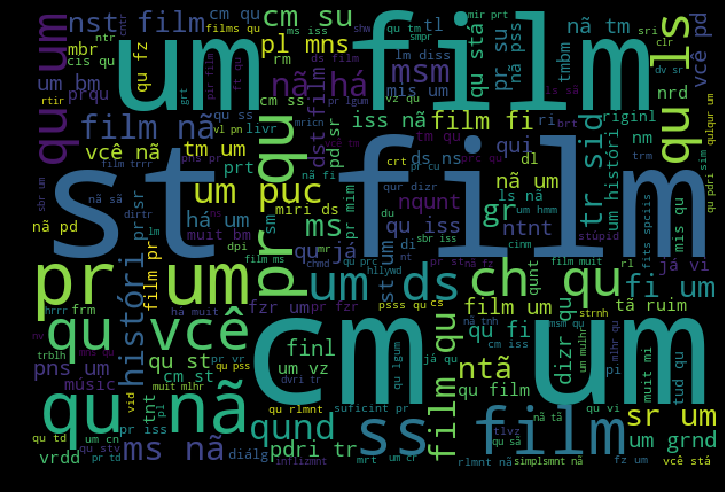

In [88]:
plotRelacionadas('neg')

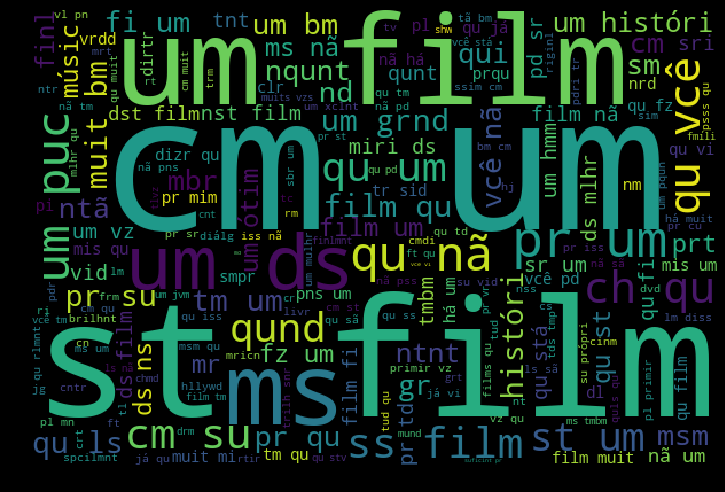

In [89]:
plotRelacionadas('pos')